## Tournament Documentation

This document will contain the documentation and procedure for tournaments, and data for such.

To start, the data is gathered from the voidpoll regular and tournament daily polls, as well as possibly the discord data collection bot, the "Daily Void Deducer", a.k.a. the DVD Player. The data collected by the DVD Player and is up to SCAM (Sorting Collection And Mat) standards.

We have agreed on a naming convention for the different tournaments,
 - Tournament #1:
    - Purple,
    - Blue,
    - Green,
    - Red
 - Tournament #2:
    - Ametrine,
    - Sapphire,
    - Emerald,
    - Ruby
 - Tournament #3:
    - Gold,
    - Silver,
    - Platinum,
    - Iridium
 - Tournament #4:
    - Violet,
    - Cerulean,
    - Olive,
    - Mat

The graphical interpretations of the tournament brackets will be representative of the naming convention. We also have agreed upon the convention for the Daily Poll SuperStars Tournament, where each bracket is named after a planet in the solar system.

---

<h3> Initializing Sample Data </h3>

Here, we are going to use some unfinished data from Luigi M. in the SCAM databanks. It has the challengers' names and some voting data, as well as the date the daily poll took place.

```python
import pandas as pd
import numpy as np

tournament_two_dailypolls_frame = pd.read_csv("C:/Users/Matrim/Documents/VSCode Documents/Python/Tournament Codebase/VOIDPOLLDATA REGULAR DAILY POLLS - The Data Collected.csv", index_col="Participant")
tournament_two_dailypolls_frame.drop("VOID POLL DATA", axis=1, inplace=True) 
    #dropping a useless column from the original SCAM database.
tournament_two_dailypolls_frame.dropna(axis=0, subset=["Votes For"], inplace=True)
    #dropping rows that dont have the full range of values (minus the ranking), due to the data being incomplete.
tournament_two_dailypolls_frame.sort_values(by=["% of Votes","1st to 2nd","Votes For"], ascending=False, inplace=True)
    #sorting the data by SCAM standards.
countList = range(tournament_two_dailypolls_frame["Total Votes"].count())
tempList = []
for i in countList:
    tempList.append(i+1)
tournament_two_dailypolls_frame["Rank"] = tempList
tournament_two_dailypolls_frame.sort_values(by=["Date of OG Poll"], inplace=True)
    #This tries to sort values by date, but it's a little wonky.
tournament_two_dailypolls_frame.to_csv('SCAM_1.csv', index=True)
tournament_two_dailypolls_frame.head()
tournament_two_dailypolls_frame["% of Votes"] = tournament_two_dailypolls_frame["% of Votes"].str.replace('%', '')
tournament_two_dailypolls_frame["% of Votes"] = pd.to_numeric(tournament_two_dailypolls_frame['% of Votes'], errors='coerce')
```


### General Rules

There are some general rules we follow for our analysis' and practicality's sake. Here are those we have codified.
- In tournaments, Luigi's vote counts for 0.5 votes. In daily polls, Luigi's vote counts as normal.
- In daily polls, ties are accepted as is.
- In the first round of standard tournaments, the two highest voted participants move on. Otherwise, only the single highest-voted participant moves on.
- Any poll in which a participant moves on is counted as a win for that participant.
- For data collection purposes, in tournaments, ties in the lower-voted participants are treated as equivalent ranks of the highest rank of the tie (i.e. 3rd and 4th place are tied, they are treated both as placing 3rd).
- Seed ranking for standard tournaments for a participant is determined by a participant's win:loss ratio(which is just their win-count if undefeated.); the percentage of votes of a participant; the number of votes between the first and second highest voted participant, in case of a tie; followed still by the raw number of votes for the participant in the original poll. Any further tie in placement is arbitrarily seeded by however those participants are sorted at the time of seeding.


#### Quick Graphical Visualization

The graphical visualization here is a frequency map of the % of votes of all of the participants so far.

```py
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,7))
sns.set_style('white')

sns.histplot(tournament_two_dailypolls_frame, x="% of Votes",hue="Votes For",palette="viridis",bins=13)
plt.ylabel("Frequency")
plt.xlabel("Percentage of Total Votes (%)")
#plt.xlim((1,95))
#plt.ylim((20,100))
plt.title("Tournament Two Prelim. Daily Polls Ranking Results, 3-15-2025")
plt.grid(which="major",axis="y")
plt.tight_layout()
sns.despine()
plt.show()
```
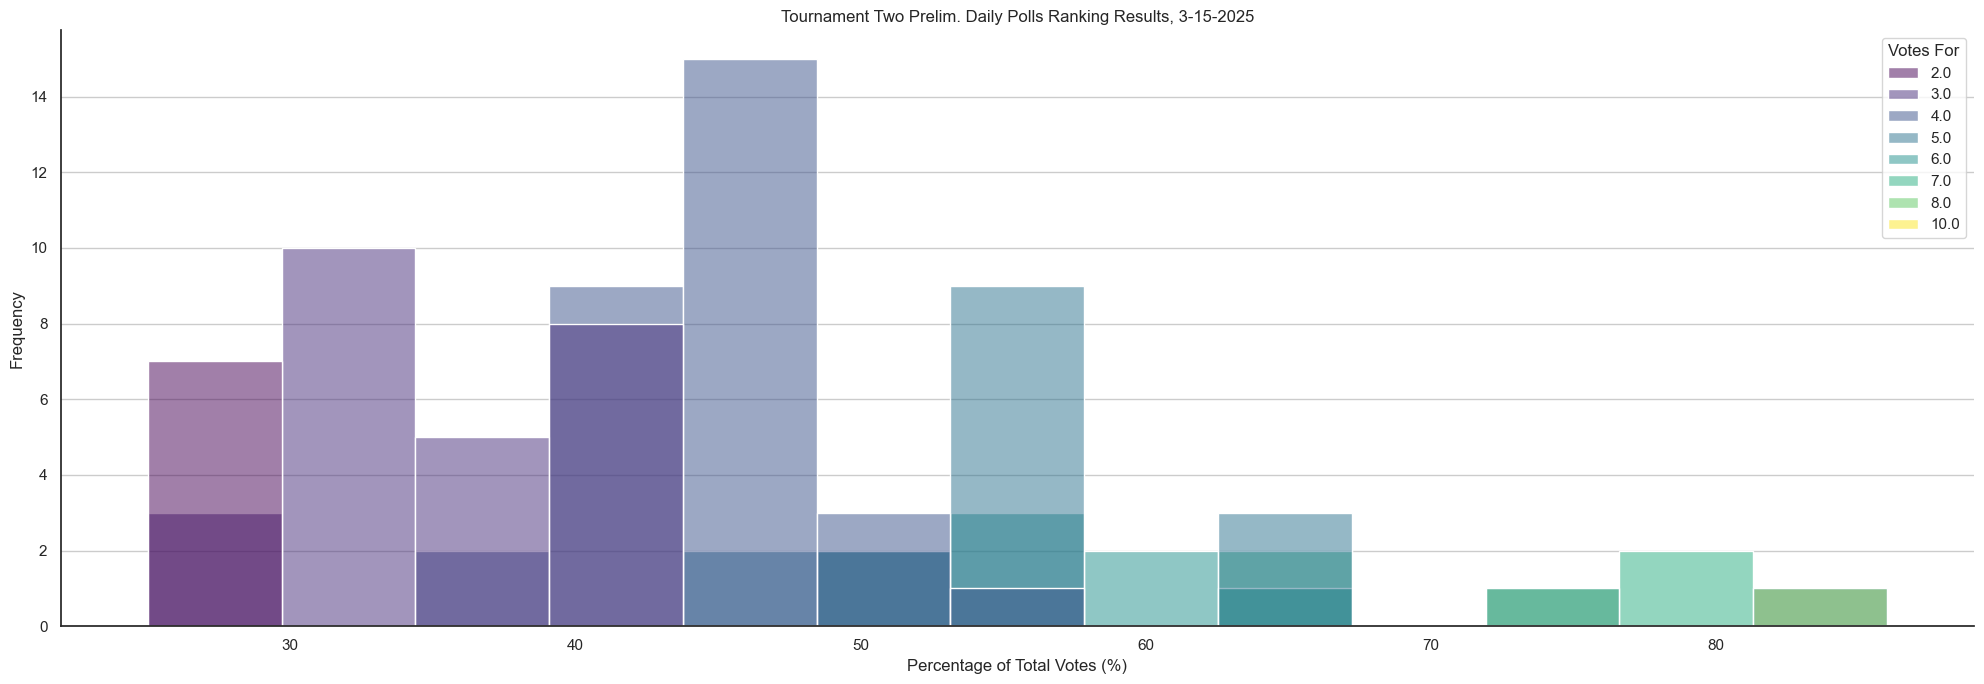

### SCAM Database Backend

Most of the SCAM test data was taken from the google sheets with the hand-inputted values, as a csv, downloaded from google sheets. This is fine, for testing, but achieving full integration with google sheets is an arduous process outside the scope of the SCAM framework. What is not outside of SCAM's parameters is using the hand-gathered data as a way to check the DVD Player's data collection results. The general principle is that the DVD Player will collect data about polls and participants, and will then check some of the data against the data that has been gathered by hand, and then will log and store the data to a few csv files on the machine the bot is running on. These csv files will be used to initialize the bot on startup, and part of the bot's startup procedure will be doing a cross check between the hand-fed data and an initial data scan it gathers on the channel.

Below is showing the creation and usage of a translation map for discord `user.id`s to names that humans can parse, as well as loading our test-data set for cross-checking. We also input a few specific pieces of data here, mainly the datetime.datetime object, which is an object that has consistency across discord's library.

In [31]:
import pandas as pd
import numpy as np
import datetime as datetime

#pd.set_option('display.max_colwidth', None)

#Starting parameters for sanity checks.
validationStartTime = datetime.datetime(2025,1,12,0,0,1)
dtypeVerifyData = {"Participant":"str","Votes For":"int64","1st to 2nd":"int64","Total Votes":"int64"}
dtypeIDMap = {"Translation User ID":'int64',"Voters":"string"}
dtypeParticipantMap = {"Participant Translation Input":"string","Participant Translation Output":"string"}

notLuigiChannelID = 1351349599645864071
channelID = 1350511481850036345
luigiChannelID = 1230971301989187626
botChannelID = 1287896872878604350

def Translate(transLiteratee,mapFrame):
    for i,map in mapFrame.iterrows():
        if transLiteratee == map.iloc[0]:
            return map.iloc[1]

#Data initialization
initialIDMap = pd.read_csv("C:/Users/Matrim/Documents/VSCode Documents/Python/Tournament Codebase/VOID POLL TOURNAMENT DATA - Translation Tables.csv", usecols=[4,5],nrows=26,dtype=dtypeIDMap)
    #reads the userID section of the translation tables file, and makes sure the datatypes are correct, specifically that the IDs are int64.
idMap = initialIDMap.dropna(axis=0)
    #This drops all rows with n/a values.
print(f"The data type of the stored user IDs is {initialIDMap["Translation User ID"].dtype}.") 
    #should be int64, if its not, it will throw an error.
assert Translate(331842608429006848,idMap) == 'ultra robin'
    #Making sure the userID translation table gives at least one right value.

initialParticipantMap = pd.read_csv("C:/Users/Matrim/Documents/VSCode Documents/Python/Tournament Codebase/VOID POLL TOURNAMENT DATA - Translation Tables.csv",usecols=[0,1],dtype=dtypeParticipantMap)
    #Reading the participant input/output section of the translation tables and makes sure that the values are strings.
initialParticipantMap.dropna(axis=0,inplace=True)
    #Drops n/a valued rows. Not really needed, but there just in case.
initialParticipantMap["Participant Translation Input"] = initialParticipantMap["Participant Translation Input"].apply(str.lower)
    #now we make it non-case dependent, but we have to make sure the input message is handled in lowercase.
lowCaseParticipantMap = initialParticipantMap
assert Translate(str.lower("3,000,000 Twitch chatters in a Trench Coat"),lowCaseParticipantMap) == "Three Million Twitch Chatters in a Trench Coat"

initialVerificationData = pd.read_csv("C:/Users/Matrim/Documents/VSCode Documents/Python/Tournament Codebase/VOIDPOLLDATA REGULAR DAILY POLLS (Tournament 2) - The Data Collected.csv",usecols=range(1,8),nrows=99,dtype=dtypeVerifyData)
    #Reading regularpolls, its our verification state.
initialVerificationData.drop("Rank",axis=1,inplace=True)
    #This is dropping the Rank column.
initialVerificationData.dropna(subset=["Total Votes"], inplace=True)
    #This drops rows that have n/a values for total votes.
initialVerificationData["Date of OG Poll"] = initialVerificationData["Date of OG Poll"].apply(datetime.datetime.fromisoformat)
    #This turns the date column into discord-friendly time.
print(f"The data type of the stored dates is {initialVerificationData["Date of OG Poll"].dtype}")
dataLookupTable = initialVerificationData.set_index("Participant")
dataLookupTable = dataLookupTable.T

lowCaseParticipantMap



The data type of the stored user IDs is int64.
The data type of the stored dates is datetime64[ns]


,Participant Translation Input,Participant Translation Output
0,jack skellington,Jack Skellington
1,annoying apple,Annoying Apple
2,mangleslash,MangleSlash
3,jules with a steel chair,Jules with a Steel Chair
4,every rat in paris,Every Rat in Paris
...,...,...
233,jonas 2(a genetically modified clone of ronku),Jonas 2(A genetically modified clone of Ronku)
234,gru,Gru
235,dr. robotnik,Dr. Robotnik
236,the moon,The Moon


With our initial data loaded in, we only have to define a function that will make later operations much easier. It isnt exactly adaptible, but this shows something that is important in coding, the thought process behind ideas. What led me to create this function, and eventually the actual implemented version, was a somewhat non-trivial problem, that being, "How far away was second place to first place?" This is easy for a human to do, we just look at the numbers and compare them, but for a computer, its a little more tricky. The way I went about solving this was **simplifying** the problem significantly, by making an assumption that implementation would come naturally if I could figure the problem out on a simpler data structure, a dictionary.

In [45]:
JoemDictionary = {"Fire":7,"Sun":3,"Joem":4,"Yyasulani":9}
def FindFirstToSecond(trilobiteDict:dict):
    joem = max(trilobiteDict.values())
        #get the maximum votes for
    first = [trilobiteDict[key] for key in trilobiteDict if trilobiteDict[key] == joem]
        #creates a list of len(list) == number of first place participants.
    if len(first) > 1:
        #if there is more than one first place participant, returns 0.
        return 0
    else:
        second = max([trilobiteDict[key] for key in trilobiteDict if trilobiteDict[key] < joem])
            #finds the maximum of a new list that has all votes for numbers below first place.
        return joem - second
            #returns the difference between first and second place.
assert FindFirstToSecond(JoemDictionary) == 2

---

## Bot Documentation



During the course of logging the data by hand of the first tournament and preliminaries, I realized that the work Luigi and I were doing could be done by something that was more, 'built for the task'. Thus the conception did arise of creating a discord bot for the sole purpose of logging this data effectively. The bot's name is Daily Void Deducer or the DVD Player for short, and its task would be to not only add to the SCAM repository, but to be able to act as a middleman between the SCAM database and the average user; accessing the data and reporting to the user.

Th rest of this document will contain the processes and procedures I use in the creation and completion of the DVD Player.

#### The Beginning

To start, I initialized the bot by going to the discord dev site, and choosing to create an application. I then went to a site that generated an invite link based on the permissions I needed. Something that I missed, and eventually had to do, was set the intent of message content to true on the OAuth section of the original dev site. Then, on a Geeks4Geeks page, I was guided through the initial code required to make the bot work. Here is some of that code:

```python
import discord
import os
from dotenv import load_dotenv

load_dotenv("C:/Users/Matrim/Documents/VSCode Documents/Python/Tournament Codebase/DVD Player.env")

```

There was a bit of code that I had to modify because it was quite outdated. Here are the areas of code with my comments

```python
intents = discord.Intents.default()
intents.message_content = True
    #getting intents flag set, and then 

client = discord.Client(intents=intents)
    #Creates a client with the intents specified in the above variable.

token = os.getenv('TOKEN')
    #gets token string from "DVD Player.env"

@client.event
async def on_ready():
    print("Logged in as a bot {0.user}".format(client))

    #general way to do things with the bot.
```

There was another code snippet that I had to use, but it has a private key that allows anyone who has it to gain full control over the bot, so I will not detail it here. Luigi also has this key, as his contributions to SCAM are immense, and I would not be doing anything like this without him.

After a bit of working with the bot, I created a command that allows a user to query the oldest $x$ messages for information on polls that happened in those messages. Here is some of the code for that.

```python

@bot.command()
async def PollLookup(ctx, *, lim):
    channel = bot.get_channel(channelID)
    messages = [i async for i in ctx.channel.history(limit=int(lim),oldest_first = True)]
        #part of a thing from SO to find stuff in message history.
    for i in messages:
        if i.poll != None:
            pollMessage = str(i.poll.question)
            if "who would win" in pollMessage.lower() or "free-for-all" in pollMessage.lower():
                if "bracket" not in pollMessage.lower() and "finals" not in pollMessage.lower():
                    await ctx.send(i.jump.url)
```

This command is now the basis for all further data gathering procedures that the DVD Player does. This represents how data gathering is possible and gives a framework for large-scale gathering operations. A little tweaking to the command, and a new version arises.

```python

@bot.command()
async def PollLookup(ctx, *, lim):
    start_time = time.perf_counter()
    channel = bot.get_channel(channelID)
    messages = [i async for i in ctx.channel.history(limit=int(lim),oldest_first = True)]
        #part of a thing from SO to find stuff in message history.
    for i in messages:
        if i.poll != None:
            pollMessage = str(i.poll.question)
            if "who would win" in pollMessage.lower() or "free-for-all" in pollMessage.lower() or "and timmy turner won the last poll" in pollMessage.lower():
                if "bracket" not in pollMessage.lower() and "finals" not in pollMessage.lower():
                    await ctx.send(i.jump_url)
                    answerList = i.poll.answers
                    for j in answerList:
                        participant = j.media.text
                        votersList = [voter.id async for voter in j.voters()]
                        if votersList == []:
                            votersList = "No Voters"
                        try:
                            votePercentage = j.vote_count / j.poll.total_votes
                        except ZeroDivisionError:
                            await ctx.send(f"Poll had zero total votes, and thus is not useful.")
                            break
                            #Remember that this vote percentage is only true for non-Tournament polls!
                        await ctx.send(f"Participant  #{j.id} is {participant}.\n The users who voted for this participant are: \n {votersList} \n This participant recieved{votePercentage*100:.0f} of the total vote.")
    end_time = time.perf_counter()
    await ctx.send(f"Done. Operation took {end_time-start_time:.3f} seconds.")
```

To explain what this all does differently, focus on the bits after `await ctx.send(i.jump_url)`. First, we keep a variable, `answerList` as the `answers` attribute of the original poll. then we iterate over the answers. In this, we store the participant, and we use an **asyncronous iterator**, the `voters()` method of the `PollAnswer` class, to create a list of users who voted for the participant in question. When a participant has zero votes, the votersList is replaced with a string. The `try: except:` block there is to stop polls with 0 votes from dividing by zero. At the end of all of that, the bot checks the time it took between starting the operation and sending the done message, and sends that to the user.

Now, we'll look at an updated startup function. The idea is that this startup async function will do a smaller, focused check of polls, similar to above, output some results to a dataframe*(we'll get back to this, but we are going to use `print`s for the actual output here, for testing purposes.)*, and check that frame against a test one that we initialized before client login.

```python

@bot.event
async def on_ready():
    print("Logged in as a bot {0.user}".format(bot))
        #Initial login.
    start_time = time.perf_counter()
    chappel = bot.get_channel(notLuigiChannelID)
#       SO had this but it didnt change the code meaningfully, and I presume it was an older iteration
#       of discordpy that used this implementation.
#       Now! it does something and is the basis for seeing and typing in diff channels.
    messages = [message async for message in chappel.history(limit=402,after=validationStartTime,oldest_first=True)]
        # gets async message history from the chappel channel as a list.
    for i in messages:
        if i.poll != None:
            pollMessage = str(i.poll.question)
            if "who would win" in pollMessage.lower() or "free-for-all" in pollMessage.lower():
                if "bracket" not in pollMessage.lower() and "finals" not in pollMessage.lower():
                    answerList = i.poll.answers
                    for j in answerList:
                        participant = j.media.text
                        votersList = [voter.id async for voter in j.voters()]
                        votersList = [Translate(i,idDict) for i in votersList]
                        if votersList == []:
                            votersList = "No Voters"
                        try:
                            votePercentage = j.vote_count / j.poll.total_votes
                        except ZeroDivisionError:
                            print(f"Poll had zero total votes, and thus is not useful.")
                            break
                            #Remember that this vote percentage is only true for non-Tournament polls!
                        print(f"Participant #{j.id} is {participant}.\nThe users who voted for this participant are: \n {votersList} \nThis participant recieved {votePercentage*100:.0f}% of the total vote.")
    end_time = time.perf_counter()
    print(f"Done. Operation took {end_time-start_time:.3f} seconds.")
```

We add a few variables and a few print strings to this to get our final version for testing.

```python
@bot.event
async def on_ready():
    print("Logged in as a bot {0.user}".format(bot))
        #Initial login.
    chappel = bot.get_channel(notLuigiChannelID)
#       SO had this but it didnt change the code meaningfully, and I presume it was an older iteration
#       of discordpy that used this implementation.
#       Now! it does something and is the basis for seeing and typing in diff channels.
    messages = [message async for message in chappel.history(limit=402,after=validationStartTime,oldest_first=True)]
        # gets async message history from the chappel channel as a list.
    for i in messages:
        if i.poll != None:
            pollMessage = str(i.poll.question)
            if "who would win" in pollMessage.lower() or "free-for-all" in pollMessage.lower():
                if "bracket" not in pollMessage.lower() and "finals" not in pollMessage.lower():
                    answerList = i.poll.answers
                    firstValue = max([answer.vote_count for answer in answerList])
                    winners = [answer.text for answer in answerList if answer.vote_count == firstValue]
                    if len(winners) > 1:
                        secondValue = firstValue
                    else:
                        secondValue = max([answer.vote_count for answer in answerList if answer.vote_count < firstValue])
                    
                    for j in answerList:
                        participant = j.media.text
                        votersList = [voter.id async for voter in j.voters()]
                        votersList = [Translate(i,idDict) for i in votersList]
                        if votersList == []:
                            votersList = "No Voters"
                        try:
                            votePercentage = j.vote_count / j.poll.total_votes
                        except ZeroDivisionError:
                            print(f"Poll had zero total votes, and thus is not useful.")
                            break
                            #Remember that this vote percentage is only true for non-Tournament polls!
                        print(f"Participant #{j.id} is {participant}.\nThe users who voted for this participant are: \n {votersList} \nThis participant recieved {votePercentage*100:.0f}% of the total vote.")
                    print(f"First place achieved {firstValue} votes.\nThe distance between first and second place is {firstValue - secondValue} votes.\nThe victor(s) is/are\n {winners}.")
    end_time = time.perf_counter()
    print(f"Done. Startup took {end_time-start_time:.3f} seconds.")
```

The above code accesses the specific values we care about in the SCAM database.

#### Below is a log of my progress on the bot as time progresses.

- 3/15/25: After working on the bot a bit, at the end of the day, I have gotten the bot into a state such that it can accept a few minor commands, and it can recognize historical polls in its own channel. Today had very good progress.
- 3/17/25: Midday, I have worked on the bot a bit, and come to a realization that if I can get the bot to directly repeat certain information about old polls, it will allow me to directly start on the next phase of the DVD player. Fortune is with me today. I have made some progress in data gathering. I can acquire much of the data that we use from the polls, although it is a slow process. One major decision that needs to be made stems from a choice of prioritizing ease of data collection and storage or up-front time allocation. Essentially, I am, although not at an impasse, understanding that doing a full lookup of the entire channel is a time-sink. **Update:** I have acquired a statement from Luigi that confirms a choice for full-checks of the database upon every data collection. As of 3:20 PM, I am starting work on what will be the bulk of the SCAM database. I have implemented the data initialization we needed, and re-worked the log-on procedure to a small-scale PollLookup request for cross-check purposes. Log-in procedure is in port-over state, there are a few changes I still have to make to the PollLookup command to fully start data integration. Otherwise, I am now mainly waiting on the go-ahead from one of the server owners to import the bot. One important change that should be addressed is that the bot should now only work on designated channels.
-3/18/25: Not very much work today, all work is going towards documentation and the data lookup features. There were some small updates with the server owner, but still waiting for the greenlight to import.
-3/19/25: Some decent progress today, mostly on backend. I fully updated the tournaments sheets with data showing how many battles each participant has been in, how many they've won, and the ratio of these two. I have also documented many cases of inconsistency in participants' names, and have found a solution to these inconsistencies! I will refactor the `Translate()` function to allow itself to be used by any dictionary of the right format. I spoke with Luigi and he agreed to change total seeding. There is a little more on backend that should be covered, and that is that I have switched how I use the 
---

### Bot Commands 

- The bot no longer does this. ~~Not a command, but making a poll with the phrases "who would win" or "free-for-all" in the question will alert the bot, and unless the question also contains "bracket" or "finals", the bot will respond with "Goku, obviously.~~" *(updated 3/17/25)*
- !test : The bot will respond with whatever was entered directly after !test. Essentially an echo command. Will only respond if accessed from a proper channel.*(updated 3/18/25)*
- !PollLookup : This one requires an input, a number directly after the command, $x$. By default checks the oldest $x$ messages, and responds with links to each poll that contains "who would win" or "free-for-all" in the question but not those that have "bracket" or "finals" in the question, as well as information about the participants, namely the names of participants, who voted for each one, and the percentage of the total vote each participant recieved. Will only respond if in one of the channels listed in the code.*(updated 3/18/25)*